# **Q 5.1**

For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. ( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )

In [0]:
import pandas as pd
data=pd.read_csv("/content/drive/My Drive/internship/INFY.csv")

In [0]:
data= data[ data.Series == 'EQ' ]
data.set_index('Date', inplace=True)

In [3]:
data['Day_Perc_Change']=(data['Close Price'].pct_change())
data['Day_Perc_Change']=data['Day_Perc_Change'].fillna(0) 
data.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Day_Perc_Change
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,494.000000,494.000000
mean,961.440789,961.070040,971.092713,951.052733,960.845648,960.945749,961.166498,6.056365e+06,5.469840e+09,1.361482e+05,3.605878e+06,61.759008,-0.000094
std,220.761549,220.091227,222.968974,218.714372,220.968590,221.029267,221.102384,5.451445e+06,4.770342e+09,8.557589e+04,2.840733e+06,9.924135,0.026367
min,619.100000,621.000000,628.000000,599.850000,619.500000,619.100000,613.780000,5.457170e+05,5.060941e+08,1.388600e+04,3.077410e+05,26.380000,-0.486038
25%,735.025000,736.187500,742.700000,729.012500,734.125000,734.462500,735.720000,3.148044e+06,3.350973e+09,9.246300e+04,2.064895e+06,55.142500,-0.007175
50%,956.750000,957.525000,964.775000,948.000000,956.025000,955.975000,955.060000,4.905804e+06,4.601808e+09,1.197605e+05,3.053880e+06,62.270000,0.000755
75%,1150.150000,1145.412500,1161.675000,1135.962500,1147.950000,1150.150000,1148.280000,7.303918e+06,6.042062e+09,1.551745e+05,4.332777e+06,68.767500,0.009679
max,1441.100000,1449.000000,1467.900000,1430.000000,1440.000000,1441.100000,1451.300000,8.220248e+07,7.662502e+10,1.192900e+06,4.202849e+07,88.700000,0.046811


In [0]:
mean_daily_return= data['Day_Perc_Change'].mean()
daily_STD_return= data['Day_Perc_Change'].std()

In [5]:
data['Close Price'].pct_change().dropna().mean()

-9.371815191464236e-05

In [0]:
import math
annual_mean =  mean_daily_return * 252
annual_stdev =daily_STD_return * math.sqrt(252)

In [7]:
print('Mean daily return :',mean_daily_return)
print('Daily standard deviation of return :',daily_STD_return)
print('Annual mean:',annual_mean)
print('Annual standard deviation:',annual_stdev)

Mean daily return : -9.352843905651555e-05
Daily standard deviation of return : 0.026367329989274182
Annual mean: -0.02356916664224192
Annual standard deviation: 0.4185683873303692


# **Q 5.2**


Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [0]:
stock1 = pd.read_csv('/content/drive/My Drive/internship/ITC.csv')
stock2 = pd.read_csv('/content/drive/My Drive/internship/MARUTI.csv')
stock3 = pd.read_csv('/content/drive/My Drive/internship/PVR.csv')
stock4 = pd.read_csv('/content/drive/My Drive/internship/SUNTV.csv')
stock5 = pd.read_csv('/content/drive/My Drive/internship/LALPATHLAB.csv')

In [9]:

portfolio = pd.DataFrame({'ITC':stock1['Close Price'],
                                    'MARUTI': stock2['Close Price'],
                                    'PVR':stock3['Close Price'],
                                    'SUNTV': stock4['Close Price'],
                                    'LALPATHLAB':stock5['Close Price']})
portfolio.dropna(inplace=True)
portfolio

,ITC,MARUTI,PVR,SUNTV,LALPATHLAB
0,277.95,6823.90,1524.95,912.20,900.60
1,283.45,6953.95,1539.00,894.70,910.95
2,281.65,6958.20,1530.30,887.05,911.70
3,277.90,6831.05,1515.05,871.35,909.75
4,286.20,6790.55,1513.55,852.40,910.25
...,...,...,...,...,...
489,304.25,6710.00,1802.30,551.10,1024.95
490,307.00,6709.65,1780.10,528.90,1013.10
491,301.90,6702.00,1748.50,540.70,1006.10
492,300.65,6650.15,1758.45,541.15,982.90


In [10]:
import numpy as np
weights = np.full( portfolio.shape[1], 1/portfolio.shape[1] )
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [11]:
# Portfolio Mean Average Return can be calculated either from: the summary data or the portfolio table
def portfolio_annual_returns(portfolio, weights):
    return np.sum( portfolio.pct_change().mean() * weights ) * 252  

round( portfolio_annual_returns(portfolio, weights), 2 )

0.01

In [12]:
# Portfolio Covarence matrix
portfolio_covarince = portfolio.pct_change().cov()
portfolio_covarince

,ITC,MARUTI,PVR,SUNTV,LALPATHLAB
ITC,0.000199,0.000039,0.000023,0.000019,-0.000012
MARUTI,0.000039,0.000201,0.000071,0.000004,0.000009
PVR,0.000023,0.000071,0.000382,0.000042,0.000016
SUNTV,0.000019,0.000004,0.000042,0.000530,0.000009
LALPATHLAB,-0.000012,0.000009,0.000016,0.000009,0.000277


In [13]:
def portfolio_annual_volatility( portfolio, weights ): 
    return np.sqrt(
        np.dot( 
            weights.T, 
            np.dot( portfolio.pct_change().cov(), weights )
        ) 
        * np.sqrt(252)
    )

round( portfolio_annual_volatility(portfolio,weights), 2 )

0.04

In [14]:
print("Portfolio Annualized Return: ", round( portfolio_annual_returns(    portfolio, weights ), 2) )
print("Portfolio Annualized Volatility:  ", round( portfolio_annual_volatility( portfolio,weights ), 2) )

Portfolio Annualized Return:  0.01
Portfolio Annualized Volatility:   0.04


# **Q 5.3**
Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

In [15]:
def portfolio_sharpe( portfolio, weights ): 
    return portfolio_annual_returns( portfolio, weights ) / portfolio_annual_volatility( portfolio, weights )

round( portfolio_sharpe(portfolio, weights), 2 )

0.31

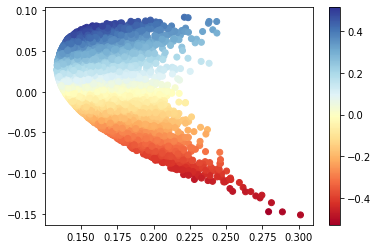

In [16]:
#  Monte Carlo Simulation
import matplotlib.pyplot as plt

returns = portfolio.pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

num_portfolios = 25000

#set up array to hold results
results = np.zeros((3,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(5)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    

    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]    
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

results_frame
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()

# **Q 5.4**
Mark the 2 portfolios where -
Portfolio 1 - The Sharpe ratio is the highest
Portfolio 2 - The volatility is the lowest. 

In [17]:
def normalize_weights( weights ):
    for i in range(0,3):
        weights  = np.round( weights, 3 ) 
        weights /= weights.sum()
    return np.asarray(weights)
    
def random_weights():
    weights  = np.random.rand(portfolio.shape[1])
    return normalize_weights( weights )

random_weights()

array([0.145, 0.365, 0.276, 0.057, 0.157])

In [18]:
scatter_data = pd.DataFrame()
for i in range(0, 2500):
    weights    = random_weights()
    returns    = portfolio_annual_returns(portfolio, weights )
    volatility = portfolio_annual_volatility( portfolio, weights )
    sharpe     = returns / volatility
    scatter_data = scatter_data.append([{
        "weights":    weights,
        "returns":    returns,
        "volatility": volatility,
        "sharpe":     sharpe
    }])

scatter_data.reset_index(inplace=True, drop=True)
scatter_data.head()

,weights,returns,volatility,sharpe
0,"[0.35, 0.218, 0.17, 0.217, 0.045]",0.001955,0.038023,0.051424
1,"[0.23300000000000004, 0.29900000000000004, 0.0...",-0.024957,0.038286,-0.651855
2,"[0.0949050949050949, 0.3816183816183816, 0.103...",-0.041250,0.042193,-0.977664
3,"[0.3016983016983017, 0.14685314685314685, 0.12...",-0.008271,0.037410,-0.221106
4,"[0.233, 0.063, 0.362, 0.322, 0.02]",-0.009829,0.046807,-0.209988


In [19]:
point_max_sharpe     = scatter_data.loc[ scatter_data['sharpe'].idxmax()     ]
point_max_sharpe

weights       [0.254, 0.017, 0.339, 0.008, 0.382]
returns                                 0.0814214
volatility                              0.0408037
sharpe                                    1.99544
Name: 278, dtype: object

In [20]:
point_min_volatility = scatter_data.loc[ scatter_data['volatility'].idxmin() ]
point_min_volatility


weights       [0.286, 0.25, 0.096, 0.121, 0.247]
returns                                0.0256815
volatility                             0.0334796
sharpe                                  0.767081
Name: 100, dtype: object

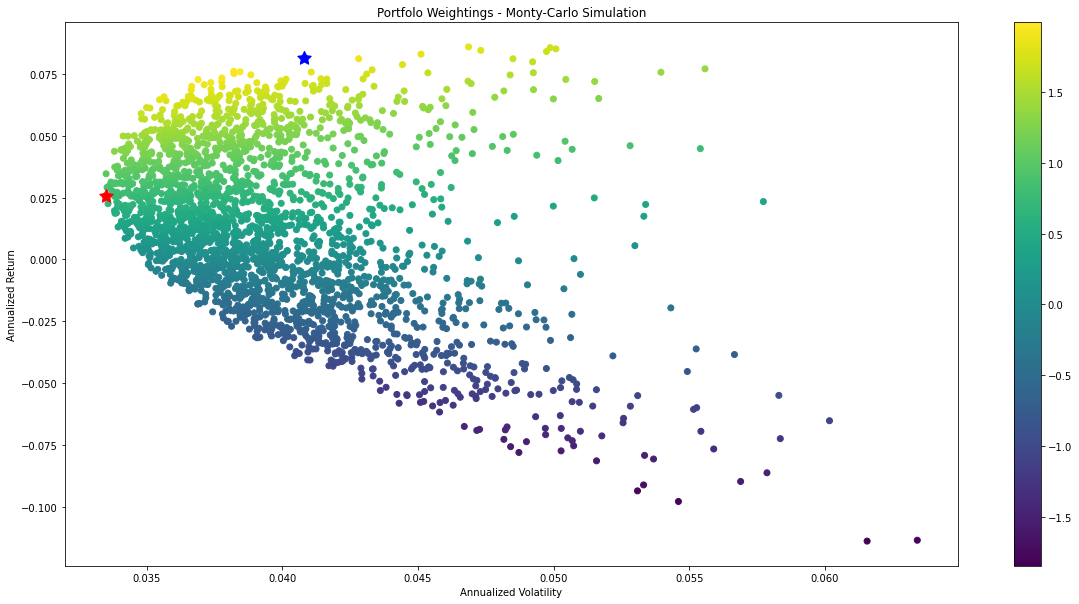

In [21]:
fig, ax = plt.subplots(figsize=(20, 10), nrows=1, ncols=1)
plt.scatter( 
    scatter_data.volatility,     
    scatter_data.returns, 
    c = scatter_data.sharpe
)
plt.title('Portfolo Weightings - Monty-Carlo Simulation')
plt.ylabel('Annualized Return')
plt.xlabel('Annualized Volatility')
plt.colorbar()

# Mark the 2 portfolios where
plt.scatter( point_max_sharpe.volatility,     point_max_sharpe.returns,     marker=(5,1,0), c='b', s=200 )
plt.scatter( point_min_volatility.volatility, point_min_volatility.returns, marker=(5,1,0), c='r', s=200 )